In [1]:
import numpy as np
import sklearn
import autosklearn.classification
from sklearn.metrics import mean_squared_error
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
import shutil
import tempfile

In [2]:
X_train_features_dir = "/home/dawlat.akaila/Documents/AI_LABS/PROJECT_FINAL/denoising-pneumonia/Feature_Extraction/BM3D/X_train_features.npy"
X_val_features_dir = "/home/dawlat.akaila/Documents/AI_LABS/PROJECT_FINAL/denoising-pneumonia/Feature_Extraction/BM3D/X_val_features.npy"
X_test_features_dir = "/home/dawlat.akaila/Documents/AI_LABS/PROJECT_FINAL/denoising-pneumonia/Feature_Extraction/BM3D/X_test_features.npy"
y_train_dir = "/home/dawlat.akaila/Documents/AI_LABS/PROJECT_FINAL/denoising-pneumonia/Feature_Extraction/BM3D/y_train.npy"
y_val_dir = "/home/dawlat.akaila/Documents/AI_LABS/PROJECT_FINAL/denoising-pneumonia/Feature_Extraction/BM3D/y_val.npy"
y_test_dir = "/home/dawlat.akaila/Documents/AI_LABS/PROJECT_FINAL/denoising-pneumonia/Feature_Extraction/BM3D/y_test.npy"

In [3]:
# load features
X_train_features = np.load(X_train_features_dir)
X_val_features = np.load(X_val_features_dir)
X_test_features = np.load(X_test_features_dir)

y_train = np.load(y_train_dir)
y_val = np.load(y_val_dir)
y_test = np.load(y_test_dir)

### Without Feature Reduction

In [4]:
temp_dir_path = tempfile.mkdtemp()

try:
    # Clean up the temporary directory before running auto-sklearn
    shutil.rmtree(temp_dir_path, ignore_errors=True)

    # Define the auto-sklearn classifier
    automl_classifier = autosklearn.classification.AutoSklearnClassifier(
        time_left_for_this_task=120,
        per_run_time_limit=30,
        ensemble_size=1,
        n_jobs=-1,
        tmp_folder=temp_dir_path,
        delete_tmp_folder_after_terminate=False  # Set this to True if you want to delete the temporary folder after training
    )
    
    # Make predictions on the val set
    automl_classifier.fit(X_train_features, y_train)
    y_pred_val = automl_classifier.predict(X_val_features)
    # Evaluate the model on the test set
    accuracy_val = sklearn.metrics.accuracy_score(y_val, y_pred_val)
    mse_val = mean_squared_error(y_val, y_pred_val)


    # Make predictions on the test set
    y_pred_test = automl_classifier.predict(X_test_features)
    # Evaluate the model on the test set
    accuracy_test = sklearn.metrics.accuracy_score(y_test, y_pred_test)
    mse_test = mean_squared_error(y_test, y_pred_test)

    # Print the auto-sklearn statistics
    print(automl_classifier.sprint_statistics())    

finally:
    # Clean up the temporary directory
    shutil.rmtree(temp_dir_path, ignore_errors=True)

/tmp/ipykernel_2434292/2026863568.py:8: DeprecationWarning: `ensemble_size` has been deprecated, please use `ensemble_kwargs = {'ensemble_size': 1}`. Inserting `ensemble_size` into `ensemble_kwargs` for now. `ensemble_size` will be removed in auto-sklearn 0.16.
  automl_classifier = autosklearn.classification.AutoSklearnClassifier(


[WARNING] [2023-11-21 03:48:49,839:Client-EnsembleBuilder] No runs were available to build an ensemble from
auto-sklearn results:
  Dataset name: 54c1e49e-87ff-11ee-a4f4-b496916b8308
  Metric: accuracy
  Best validation score: 0.969222
  Number of target algorithm runs: 33
  Number of successful target algorithm runs: 10
  Number of crashed target algorithm runs: 0
  Number of target algorithms that exceeded the time limit: 19
  Number of target algorithms that exceeded the memory limit: 4



In [5]:
print(f"Validation Accuracy: {accuracy_val}")
print(f'Mean Squared Error: {mse_val:.2f}')

Validation Accuracy: 0.5
Mean Squared Error: 0.50


In [6]:
print(f"Test Accuracy: {accuracy_test}")
print(f'Mean Squared Error: {mse_test:.2f}')

Test Accuracy: 0.3798076923076923
Mean Squared Error: 0.62


### Experimenting on 100 Features

In [7]:
X_train_features_dir = "/home/dawlat.akaila/Documents/AI_LABS/PROJECT_FINAL/denoising-pneumonia/Feature_Extraction/BM3D_100/X_train_features.npy"
X_val_features_dir = "/home/dawlat.akaila/Documents/AI_LABS/PROJECT_FINAL/denoising-pneumonia/Feature_Extraction/BM3D_100/X_val_features.npy"
X_test_features_dir = "/home/dawlat.akaila/Documents/AI_LABS/PROJECT_FINAL/denoising-pneumonia/Feature_Extraction/BM3D_100/X_test_features.npy"
y_train_dir = "/home/dawlat.akaila/Documents/AI_LABS/PROJECT_FINAL/denoising-pneumonia/Feature_Extraction/BM3D_100/y_train.npy"
y_val_dir = "/home/dawlat.akaila/Documents/AI_LABS/PROJECT_FINAL/denoising-pneumonia/Feature_Extraction/BM3D_100/y_val.npy"
y_test_dir = "/home/dawlat.akaila/Documents/AI_LABS/PROJECT_FINAL/denoising-pneumonia/Feature_Extraction/BM3D_100/y_test.npy"

In [8]:
# load features
X_train_features = np.load(X_train_features_dir)
X_val_features = np.load(X_val_features_dir)
X_test_features = np.load(X_test_features_dir)

y_train = np.load(y_train_dir)
y_val = np.load(y_val_dir)
y_test = np.load(y_test_dir)

In [9]:
temp_dir_path = tempfile.mkdtemp()

try:
    # Clean up the temporary directory before running auto-sklearn
    shutil.rmtree(temp_dir_path, ignore_errors=True)

    # Define the auto-sklearn classifier
    automl_classifier = autosklearn.classification.AutoSklearnClassifier(
        time_left_for_this_task=120,
        per_run_time_limit=30,
        ensemble_size=1,
        n_jobs=-1,
        tmp_folder=temp_dir_path,
        delete_tmp_folder_after_terminate=False  # Set this to True if you want to delete the temporary folder after training
    )
    
    # Make predictions on the val set
    automl_classifier.fit(X_train_features, y_train)
    y_pred_val = automl_classifier.predict(X_val_features)
    # Evaluate the model on the test set
    accuracy_val = sklearn.metrics.accuracy_score(y_val, y_pred_val)
    mse_val = mean_squared_error(y_val, y_pred_val)


    # Make predictions on the test set
    y_pred_test = automl_classifier.predict(X_test_features)
    # Evaluate the model on the test set
    accuracy_test = sklearn.metrics.accuracy_score(y_test, y_pred_test)
    mse_test = mean_squared_error(y_test, y_pred_test)

    # Print the auto-sklearn statistics
    print(automl_classifier.sprint_statistics())    

finally:
    # Clean up the temporary directory
    shutil.rmtree(temp_dir_path, ignore_errors=True)

/tmp/ipykernel_2434292/2026863568.py:8: DeprecationWarning: `ensemble_size` has been deprecated, please use `ensemble_kwargs = {'ensemble_size': 1}`. Inserting `ensemble_size` into `ensemble_kwargs` for now. `ensemble_size` will be removed in auto-sklearn 0.16.
  automl_classifier = autosklearn.classification.AutoSklearnClassifier(


auto-sklearn results:
  Dataset name: 9be3194a-87ff-11ee-a4f4-b496916b8308
  Metric: accuracy
  Best validation score: 0.968060
  Number of target algorithm runs: 45
  Number of successful target algorithm runs: 34
  Number of crashed target algorithm runs: 1
  Number of target algorithms that exceeded the time limit: 6
  Number of target algorithms that exceeded the memory limit: 4



In [10]:
print(f"Validation Accuracy: {accuracy_val}")
print(f'Mean Squared Error: {mse_val:.2f}')

Validation Accuracy: 0.5
Mean Squared Error: 0.50


In [11]:
print(f"Test Accuracy: {accuracy_test}")
print(f'Mean Squared Error: {mse_test:.2f}')

Test Accuracy: 0.3894230769230769
Mean Squared Error: 0.61


### LDA

In [12]:
# Standardize the features (important for LDA)
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train_features)
X_val_std = scaler.transform(X_val_features)
X_test_std = scaler.transform(X_test_features)

In [13]:
lda = LinearDiscriminantAnalysis(n_components=1)  # Set the desired number of components
X_train_lda = lda.fit_transform(X_train_std, y_train)
X_val_lda = lda.transform(X_val_std)
X_test_lda = lda.transform(X_test_std)

In [14]:
temp_dir_path = tempfile.mkdtemp()

try:
    # Clean up the temporary directory before running auto-sklearn
    shutil.rmtree(temp_dir_path, ignore_errors=True)

    # Define the auto-sklearn classifier
    automl_classifier = autosklearn.classification.AutoSklearnClassifier(
        time_left_for_this_task=120,
        per_run_time_limit=30,
        ensemble_size=1,
        n_jobs=-1,
        tmp_folder=temp_dir_path,
        delete_tmp_folder_after_terminate=False  
    )
    
    # Make predictions on the val set
    automl_classifier.fit(X_train_lda, y_train)
    y_pred_val = automl_classifier.predict(X_val_lda)
    # Evaluate the model on the val set
    accuracy_val = sklearn.metrics.accuracy_score(y_val, y_pred_val)
    mse_val = mean_squared_error(y_val, y_pred_val)


    # Make predictions on the test set
    y_pred_test = automl_classifier.predict(X_test_lda)
    # Evaluate the model on the test set
    accuracy_test = sklearn.metrics.accuracy_score(y_test, y_pred_test)
    mse_test = mean_squared_error(y_test, y_pred_test)

    # Print the auto-sklearn statistics
    print(automl_classifier.sprint_statistics())

finally:
    # Clean up the temporary directory
    shutil.rmtree(temp_dir_path, ignore_errors=True)

/tmp/ipykernel_2434292/1644473331.py:8: DeprecationWarning: `ensemble_size` has been deprecated, please use `ensemble_kwargs = {'ensemble_size': 1}`. Inserting `ensemble_size` into `ensemble_kwargs` for now. `ensemble_size` will be removed in auto-sklearn 0.16.
  automl_classifier = autosklearn.classification.AutoSklearnClassifier(


[WARNING] [2023-11-21 03:52:43,333:Client-EnsembleBuilder] No runs were available to build an ensemble from
[WARNING] [2023-11-21 03:52:43,543:Client-EnsembleBuilder] No runs were available to build an ensemble from
[WARNING] [2023-11-21 03:52:43,728:Client-EnsembleBuilder] No runs were available to build an ensemble from
auto-sklearn results:
  Dataset name: e37c982e-87ff-11ee-a4f4-b496916b8308
  Metric: accuracy
  Best validation score: 0.966318
  Number of target algorithm runs: 61
  Number of successful target algorithm runs: 46
  Number of crashed target algorithm runs: 14
  Number of target algorithms that exceeded the time limit: 1
  Number of target algorithms that exceeded the memory limit: 0



In [15]:
print(f"Validation Accuracy: {accuracy_val}")
print(f'Mean Squared Error: {mse_val:.2f}')

Validation Accuracy: 0.4375
Mean Squared Error: 0.56


In [16]:
print(f"Test Accuracy: {accuracy_test}")
print(f'Mean Squared Error: {mse_test:.2f}')

Test Accuracy: 0.38782051282051283
Mean Squared Error: 0.61


### PCA

In [17]:
scaled_X_train = scaler.fit_transform(X_train_features)

n_components = 16
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(scaled_X_train)

print(X_train_pca.shape)

(5216, 16)


In [18]:
scaled_X_val = scaler.fit_transform(X_val_features)

n_components = 16
pca = PCA(n_components=n_components)
X_val_pca = pca.fit_transform(scaled_X_val)

print(X_val_pca.shape)

(16, 16)


In [19]:
scaled_X_test = scaler.fit_transform(X_test_features)

n_components = 16
pca = PCA(n_components=n_components)
X_test_pca = pca.fit_transform(scaled_X_test)

print(X_test_pca.shape)

(624, 16)


In [20]:
temp_dir_path = tempfile.mkdtemp()

try:
    # Clean up the temporary directory before running auto-sklearn
    shutil.rmtree(temp_dir_path, ignore_errors=True)

    # Define the auto-sklearn classifier
    automl_classifier = autosklearn.classification.AutoSklearnClassifier(
        time_left_for_this_task=120,
        per_run_time_limit=30,
        ensemble_size=1,
        n_jobs=-1,
        tmp_folder=temp_dir_path,
        delete_tmp_folder_after_terminate=False  # Set this to True if you want to delete the temporary folder after training
    )
    
    # Make predictions on the val set
    automl_classifier.fit(X_train_pca, y_train)
    y_pred_val = automl_classifier.predict(X_val_pca)
    # Evaluate the model on the val set
    accuracy_val = sklearn.metrics.accuracy_score(y_val, y_pred_val)
    mse_val = mean_squared_error(y_val, y_pred_val)

    # Make predictions on the test set
    y_pred_test = automl_classifier.predict(X_test_pca)
    # Evaluate the model on the test set
    accuracy_test = sklearn.metrics.accuracy_score(y_test, y_pred_test)
    mse_test = mean_squared_error(y_test, y_pred_test)

    # Print the auto-sklearn statistics
    print(automl_classifier.sprint_statistics())

finally:
    # Clean up the temporary directory
    shutil.rmtree(temp_dir_path, ignore_errors=True)

/tmp/ipykernel_2434292/2379021001.py:8: DeprecationWarning: `ensemble_size` has been deprecated, please use `ensemble_kwargs = {'ensemble_size': 1}`. Inserting `ensemble_size` into `ensemble_kwargs` for now. `ensemble_size` will be removed in auto-sklearn 0.16.
  automl_classifier = autosklearn.classification.AutoSklearnClassifier(


auto-sklearn results:
  Dataset name: 2ad11bb6-8800-11ee-a4f4-b496916b8308
  Metric: accuracy
  Best validation score: 0.948897
  Number of target algorithm runs: 46
  Number of successful target algorithm runs: 38
  Number of crashed target algorithm runs: 0
  Number of target algorithms that exceeded the time limit: 8
  Number of target algorithms that exceeded the memory limit: 0



In [21]:
print(f"Validation Accuracy: {accuracy_val}")
print(f'Mean Squared Error: {mse_val:.2f}')

Validation Accuracy: 0.4375
Mean Squared Error: 0.56


In [22]:
print(f"Test Accuracy: {accuracy_test}")
print(f'Mean Squared Error: {mse_test:.2f}')

Test Accuracy: 0.5544871794871795
Mean Squared Error: 0.45


### T-SNE

In [23]:
# Fit the scaler on the training data and transform the training, validation, and test sets
X_train_scaled = scaler.fit_transform(X_train_features)
X_val_scaled = scaler.transform(X_val_features)
X_test_scaled = scaler.transform(X_test_features)

# Apply t-SNE to reduce the dimensionality to 2D for scaled data
tsne = TSNE(n_components=2,perplexity=5)

X_train_tsne = tsne.fit_transform(X_train_scaled)
X_val_tsne = tsne.fit_transform(X_val_scaled)
X_test_tsne = tsne.fit_transform(X_test_scaled)

In [24]:
temp_dir_path = tempfile.mkdtemp()

try:
    # Clean up the temporary directory before running auto-sklearn
    shutil.rmtree(temp_dir_path, ignore_errors=True)

    # Define the auto-sklearn classifier
    automl_classifier = autosklearn.classification.AutoSklearnClassifier(
        time_left_for_this_task=120,
        per_run_time_limit=30,
        ensemble_size=1,
        n_jobs=-1,
        tmp_folder=temp_dir_path,
        delete_tmp_folder_after_terminate=False  # Set this to True if you want to delete the temporary folder after training
    )
    
    # Make predictions on the val set
    automl_classifier.fit(X_train_tsne, y_train)
    y_pred_val = automl_classifier.predict(X_val_tsne)
    # Evaluate the model on the val set
    accuracy_val = sklearn.metrics.accuracy_score(y_val, y_pred_val)
    mse_val = mean_squared_error(y_val, y_pred_val)

    # Make predictions on the test set
    y_pred_test = automl_classifier.predict(X_test_tsne)
    # Evaluate the model on the test set
    accuracy_test = sklearn.metrics.accuracy_score(y_test, y_pred_test)

    # Print the auto-sklearn statistics
    print(automl_classifier.sprint_statistics())

finally:
    # Clean up the temporary directory
    shutil.rmtree(temp_dir_path, ignore_errors=True)

/tmp/ipykernel_2434292/1000919931.py:8: DeprecationWarning: `ensemble_size` has been deprecated, please use `ensemble_kwargs = {'ensemble_size': 1}`. Inserting `ensemble_size` into `ensemble_kwargs` for now. `ensemble_size` will be removed in auto-sklearn 0.16.
  automl_classifier = autosklearn.classification.AutoSklearnClassifier(


auto-sklearn results:
  Dataset name: 7ba61b0f-8800-11ee-a4f4-b496916b8308
  Metric: accuracy
  Best validation score: 0.946574
  Number of target algorithm runs: 51
  Number of successful target algorithm runs: 50
  Number of crashed target algorithm runs: 0
  Number of target algorithms that exceeded the time limit: 1
  Number of target algorithms that exceeded the memory limit: 0



In [25]:
print(f"Validation Accuracy: {accuracy_val}")
print(f'Mean Squared Error: {mse_val:.2f}')

Validation Accuracy: 0.5
Mean Squared Error: 0.50


In [26]:
print(f"Test Accuracy: {accuracy_test}")
print(f'Mean Squared Error: {mse_test:.2f}')

Test Accuracy: 0.5416666666666666
Mean Squared Error: 0.45


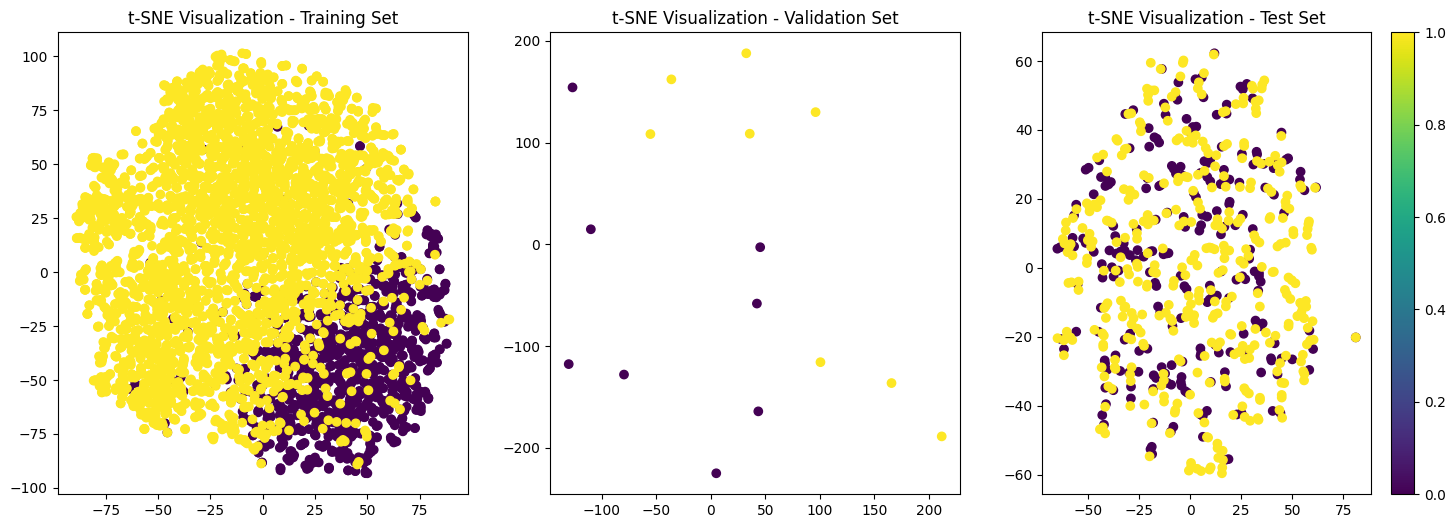

In [27]:
# Create scatter plots for training, validation, and test sets
# (similar to the previous example)
# Create scatter plots for training, validation, and test sets
import matplotlib.pyplot as plt
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=y_train, cmap='viridis')
plt.title('t-SNE Visualization - Training Set')

plt.subplot(1, 3, 2)
plt.scatter(X_val_tsne[:, 0], X_val_tsne[:, 1], c=y_val, cmap='viridis')
plt.title('t-SNE Visualization - Validation Set')

plt.subplot(1, 3, 3)
plt.scatter(X_test_tsne[:, 0], X_test_tsne[:, 1], c=y_test, cmap='viridis')
plt.title('t-SNE Visualization - Test Set')

plt.colorbar()
plt.show()